<a href="https://colab.research.google.com/github/Elby2112/Classification-Decision-Trees/blob/main/MBA_Admission_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving MBA.csv to MBA (1).csv


# **Load the Dataset**

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('MBA.csv')

# **Explore the Data**

In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Display the shape of the dataset
print(f'Dataset shape: {data.shape}')

# Check for missing values
print(data.isnull().sum())


   application_id  gender  international   gpa       major      race   gmat  \
0               1  Female          False  3.30    Business     Asian  620.0   
1               2    Male          False  3.28  Humanities     Black  680.0   
2               3  Female           True  3.30    Business       NaN  710.0   
3               4    Male          False  3.47        STEM     Black  690.0   
4               5    Male          False  3.35        STEM  Hispanic  590.0   

   work_exp          work_industry admission  
0       3.0     Financial Services     Admit  
1       5.0  Investment Management       NaN  
2       5.0             Technology     Admit  
3       6.0             Technology       NaN  
4       5.0             Consulting       NaN  
Dataset shape: (6194, 10)
application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission 

# **Handling Missing Values**
In this step, we addressed missing values in our dataset by replacing the missing entries in the race column with "Other" and filling the admission column's missing values with the most frequent outcome. This ensures that our dataset is complete and ready for analysis.


In [ ]:
# Replace missing values in the 'race' column with 'Other'
data['race'].fillna('Other', inplace=True)

# Impute missing admission values with the mode (most frequent value)
most_frequent_admission = data['admission'].mode()[0]
data['admission'].fillna(most_frequent_admission, inplace=True)

# Check if there are any missing values left in both columns
print("Missing values in 'race':", data['race'].isnull().sum())
print("Missing values in 'admission':", data['admission'].isnull().sum())


Missing values in 'race': 0
Missing values in 'admission': 0


<ipython-input-86-7659c4c6911f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['race'].fillna('Other', inplace=True)
<ipython-input-86-7659c4c6911f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

## **Encode Categorical Variables**
The attributes: gender, international, major, race, work_industry, and admission are categorical and need to be converted into a numerical format. We're using one-hot encoding technique.


In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(data, columns=['gender', 'major', 'race', 'work_industry'], drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   application_id  international   gpa   gmat  work_exp admission  \
0               1          False  3.30  620.0       3.0     Admit   
1               2          False  3.28  680.0       5.0     Admit   
2               3           True  3.30  710.0       5.0     Admit   
3               4          False  3.47  690.0       6.0     Admit   
4               5          False  3.35  590.0       5.0     Admit   

   gender_Male  major_Humanities  major_STEM  race_Black  ...  \
0        False             False       False       False  ...   
1         True              True       False        True  ...   
2        False             False       False       False  ...   
3         True             False        True        True  ...   
4         True             False        True       False  ...   

   work_industry_Health Care  work_industry_Investment Banking  \
0                      False                             False   
1                      False                             False

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'admission' column (Admit, Reject, Waitlist) into numeric values
label_encoder = LabelEncoder()
df_encoded['admission'] = label_encoder.fit_transform(df_encoded['admission'])

# Check the unique values in the 'admission' column to confirm the encoding
print(label_encoder.classes_)


['Admit' 'Waitlist']


In [ ]:
# Define features (drop 'admission' and 'application_id' from the DataFrame)
X = df_encoded.drop(columns=['admission', 'application_id'])

# Define target variable
y = df_encoded['admission']  # This should now be numeric

# Check the shapes of features and target variable
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (6194, 24)
Target shape: (6194,)


## **Split the Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the sizes of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4955, 24)
Testing set size: (1239, 24)


## **Train the Decision Tree Model**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model with entropy as the criterion
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Decision Tree model trained successfully using entropy as the criterion!")


Decision Tree model trained successfully using entropy as the criterion!


## **Evaluate the Model**


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1185   36]
 [  16    2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1221
           1       0.05      0.11      0.07        18

    accuracy                           0.96      1239
   macro avg       0.52      0.54      0.52      1239
weighted avg       0.97      0.96      0.97      1239



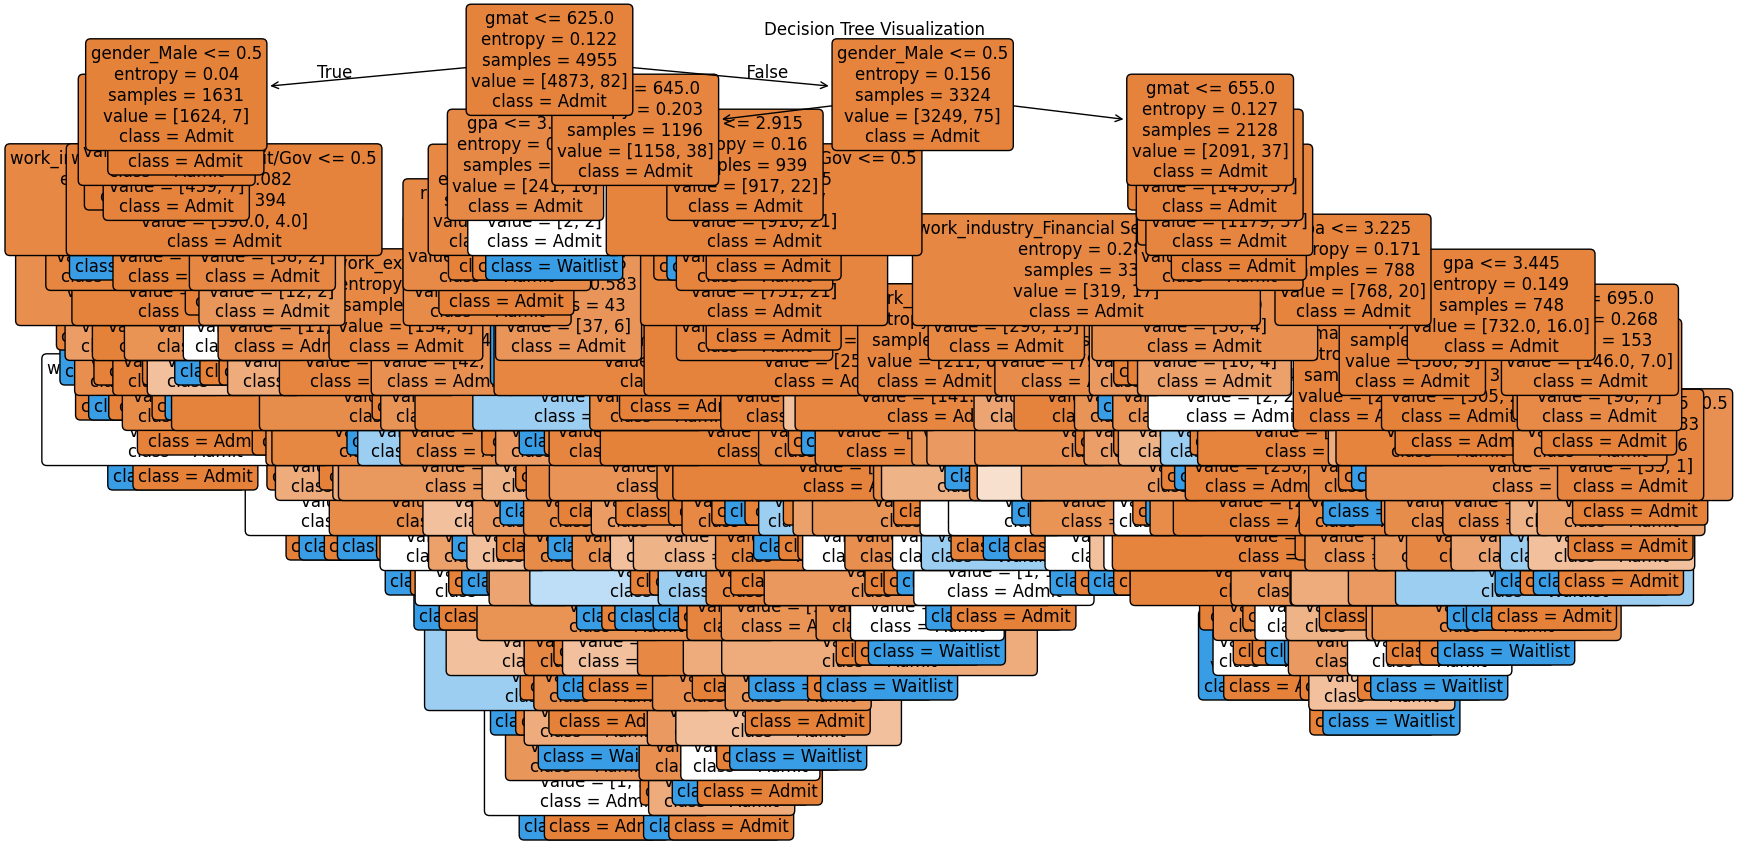

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model' is your fitted DecisionTreeClassifier
plt.figure(figsize=(20, 10))  # Adjust the size as necessary
plot_tree(model,
          feature_names=X_train.columns,  # Use the names of your features
          class_names=['Admit', 'Waitlist'],  # Class names for your target variable
          filled=True,  # Color the nodes based on the class
          rounded=True,  # Rounded corners for a better look
          fontsize=12)  # Font size for the text
plt.title('Decision Tree Visualization')
plt.show()
